Import necessary thingies

In [80]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import metrics
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LinearRegression

Recreate Data from last week

In [81]:
mushrooms=pd.read_csv("C:/Users/sguzi/Desktop/Mushrooms.csv", header=None, usecols=[0,5,20])
df = mushrooms.copy()
df.columns = ['poison', 'odor', 'spore_color']
df['poison'].replace({'p':1,'e':0},inplace=True)
df['odor'].replace({'a':0,'l':1,'c':2,'y':3,'f':4,'m':5,'n':6,'p':7,'s':8},inplace=True)
df['spore_color'].replace({'k':0,'n':1,'b':2,'h':3,'r':4,'o':5,'u':6,'w':7,'y':8},inplace=True)
df1 = pd.DataFrame()
df2 = pd.DataFrame()
df3 = pd.DataFrame()
df1['odor_count']=df['odor'].value_counts()
df2['poison_count']=df['poison'].value_counts() #not a column I chose, so excluding it
df3['sc_count']=df['spore_color'].value_counts()
df1['odor_perc']= df1['odor_count']/df1['odor_count'].sum()
df2['poison_perc']= df2['poison_count']/df2['poison_count'].sum()
df3['sc_perc']= df3['sc_count']/df3['sc_count'].sum()
#df.head(10) #test if it works

Make it all 0's and 1's, test if it works, then merge it together.

In [82]:
odor_dummies = pd.get_dummies(df['odor'])
color_dummies = pd.get_dummies(df['spore_color'])
###### check if it works ######
#print(odor_dummies.head(10))  
#print('-----------------------------')
#print(color_dummies.head(10))

Merge things together, increase dimension, get values for the two columns chosen, then get coeficcient, msd, variance score.

In [83]:
shrooms = pd.concat([df, odor_dummies, color_dummies], axis = 1)
#shrooms.head(10) #check if it works
x = shrooms.values[:, np.newaxis, 2] #increase dimension +1
x_head = x[:10]
x_tail = x[-10:]
y_head = shrooms.poison[:10]
y_tail = shrooms.poison[-10:]

regression = linear_model.LinearRegression()
regression.fit(x_head, y_head)
pred = regr.predict(x_tail)

multiply_by = regression.coef_ #multiply it by this
v_score = r2_score(y_tail, pred) #the closer to 1, the better
msd = mean_squared_error(y_tail, pred) #mean standard deviation, closer to 0 is better (helps with best fit line)

print(multiply_by)
print(msd)
print(v_score)

[-0.5]
8.875
-34.5


In [84]:
##### how slicing works, because i forgot #####
#spot for testing how this should be used in previous chunk of code
#m = [1,2,3,4,5,6,7,8,9,10,11]
#m[-5:] #last five 

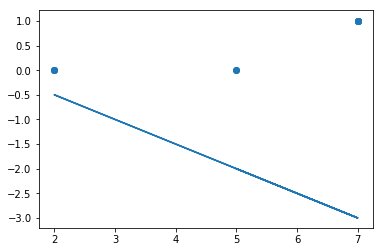

In [87]:
#odor and toxicity
plt.scatter(x_tail, y_tail)
plt.plot(x_tail, pred)
plt.xticks()
plt.yticks()
plt.show()

The line is tilted, and if I were to draw vertical lines throughout its length, it'd pass through only once, making it linear. Therefore, there's something going on between odor and toxicity. **Don't eat smelly mushrooms if you don't know what they are.**

Next is versus spore color.

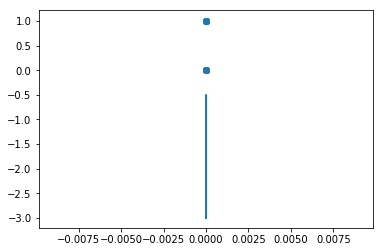

In [86]:
xsecond = shrooms.values[:, np.newaxis, 3]
xsecond_head = xsecond[:10]
xsecond_tail = xsecond[-10:]
ysecond_head = shrooms.poison[:10]
ysecond_tail = shrooms.poison[-10:]
plt.scatter(xsecond_tail, ysecond_tail)
plt.plot(xsecond_tail, pred)

plt.xticks()
plt.yticks()
plt.show()

This shows a perfectly straight vertical line, and if I were to draw a line through it, it would pass through it an infinite amount of times, making it not linear. This means, we don't know if spore colors can predict if we should eat mushrooms with a wide variety of spore colors unless we know exactly what they are.

Odor can tell us to a higher degree whether a mushroom can be poisonous. However, we cannot say the same for spore colors, and it would be much harder to predict if they're toxic or not. 
The best thing you can do regarding these fungi is - either study them until you know them inside out, or stick to store-bought ones; mushroom poisoning is not a friendly thing to experience.